<a href="https://colab.research.google.com/github/waseda-ken/data_analyze_kikagaku/blob/main/%E5%A4%9A%E5%A4%89%E9%87%8F%E8%A7%A3%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

In [ ]:
df = pd.read_csv('auto-mpg.csv')
df.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Year          392 non-null    int64  
 7   Origin        392 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 24.6+ KB


In [ ]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


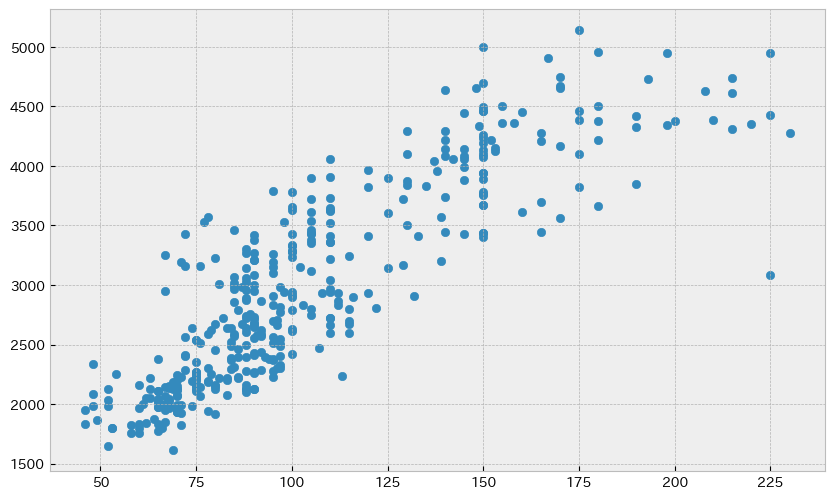

In [ ]:
#散布図
plt.scatter(df['Horsepower'], df['Weight']);

In [ ]:
df[['Horsepower', 'Weight']].corr() #corr:correlation:相関

,Horsepower,Weight
Horsepower,1.000000,0.864538
Weight,0.864538,1.000000


In [ ]:
_df = df[['Horsepower', 'Weight']].drop(df.index[(df['Horsepower']==225.0) & (df['Weight']==3086.0)])

In [ ]:
len(df)

392

In [ ]:
len(_df)

391

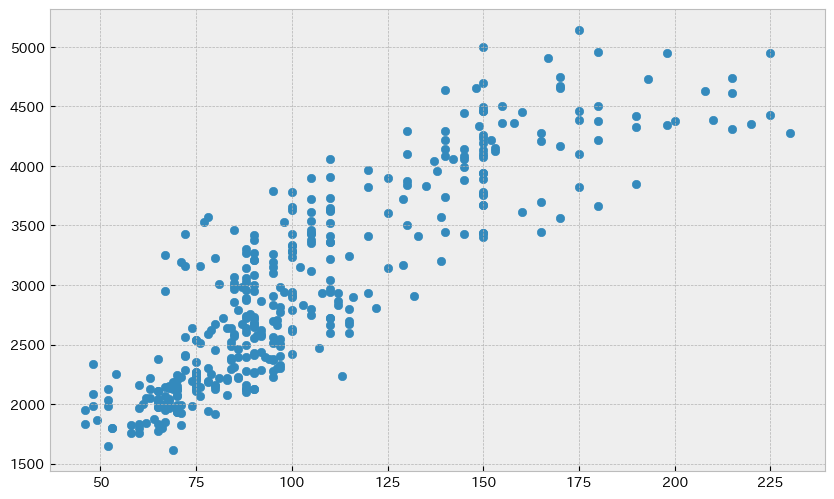

In [ ]:
plt.scatter(_df['Horsepower'], _df['Weight']);

In [ ]:
_df.corr()

,Horsepower,Weight
Horsepower,1.000000,0.874596
Weight,0.874596,1.000000


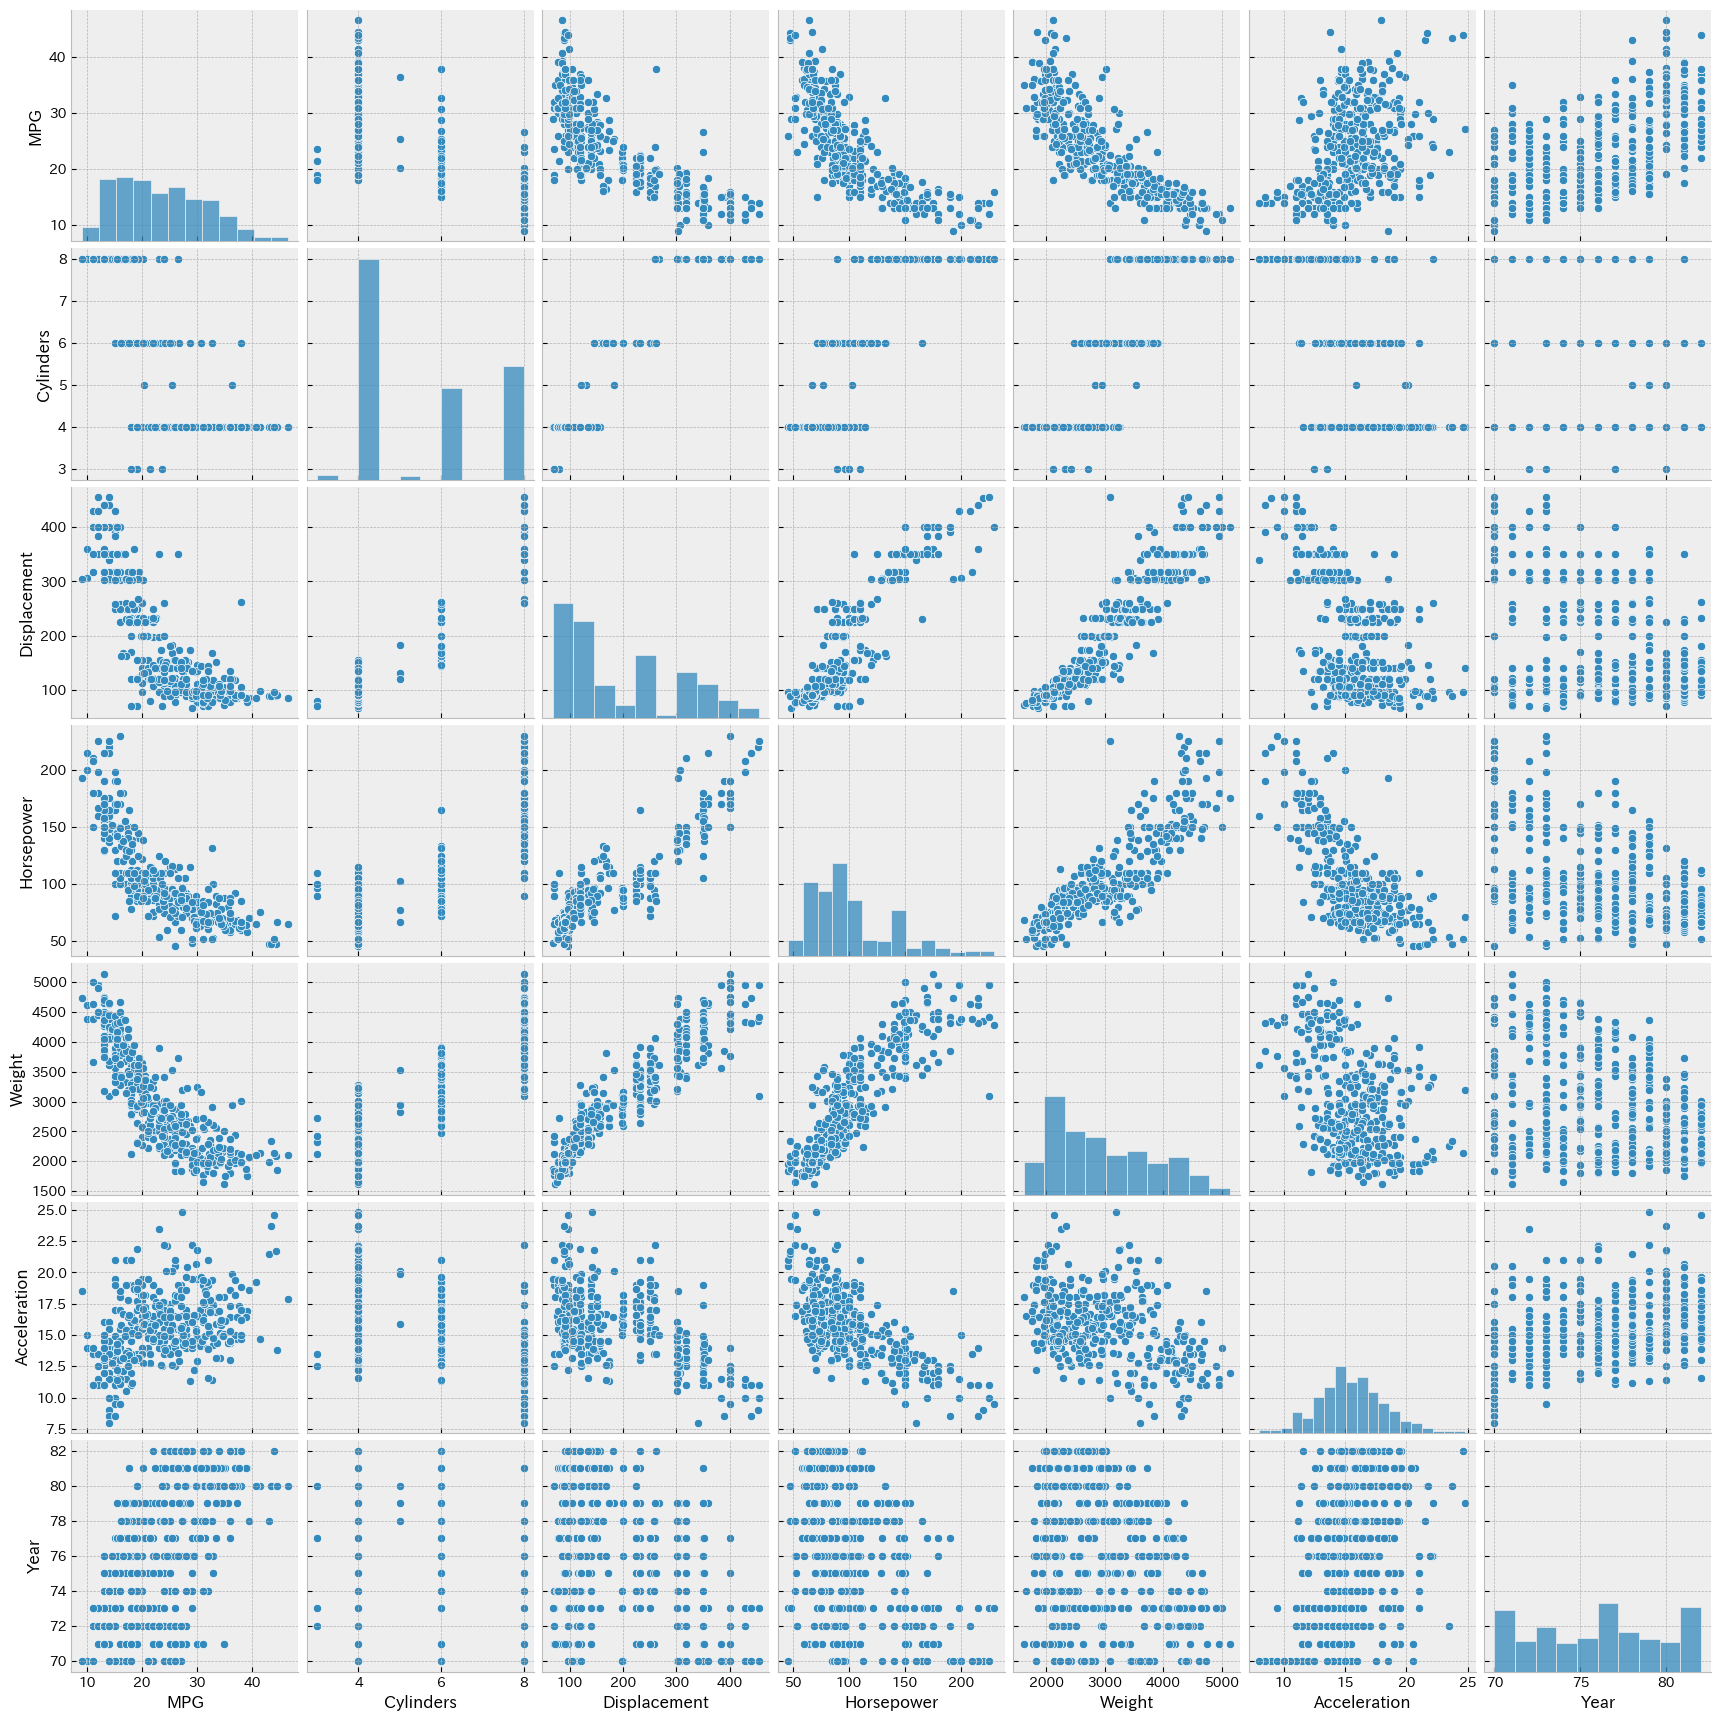

In [ ]:
#散布図
sns.pairplot(df);

In [ ]:
#相関係数
df_numeric = df.select_dtypes(include=['number'])  # 数値データのみ取得
df_corr = df_numeric.corr()  # 相関係数を計算
df_corr

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
Displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
Acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


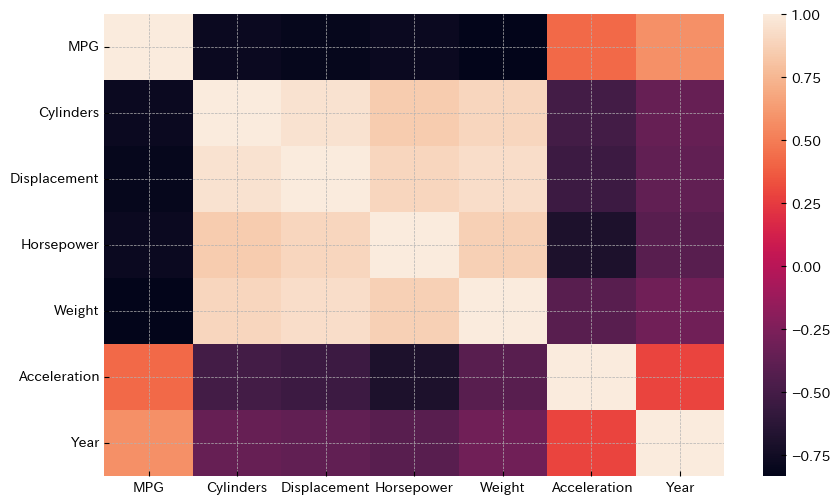

In [ ]:
#ヒートマップ
sns.heatmap(df_corr);

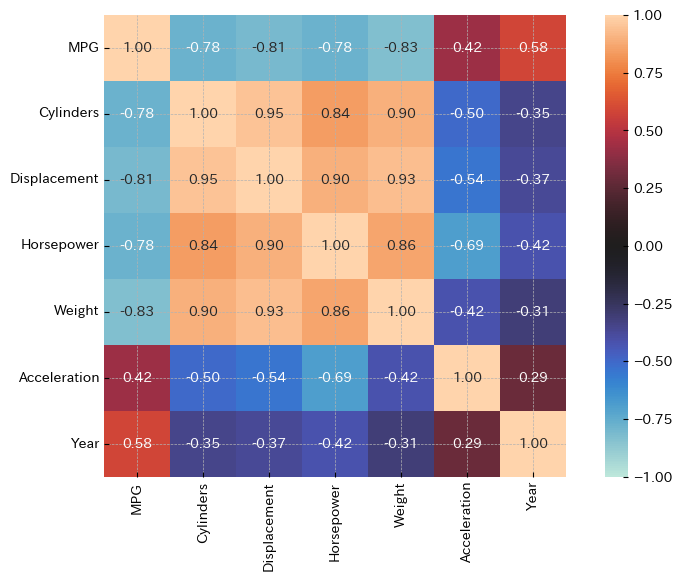

In [ ]:
sns.heatmap(df_corr, annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

##単回帰分析

In [ ]:
import statsmodels.api as sm

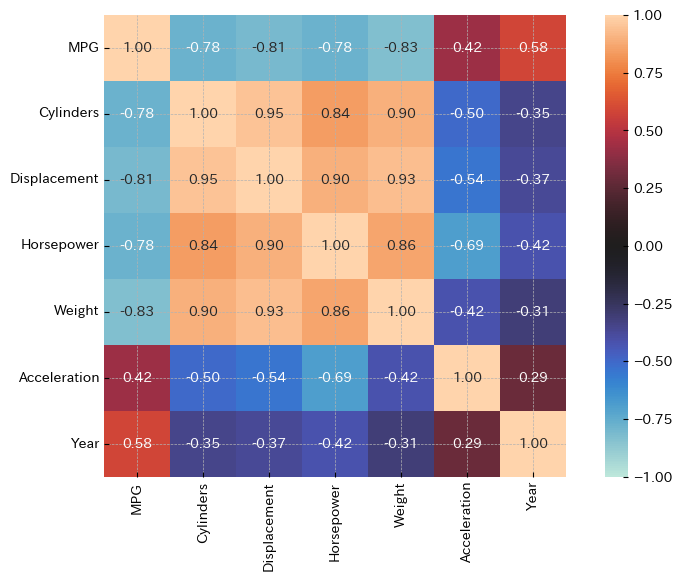

In [ ]:
sns.heatmap(df_corr, annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [ ]:
# 目的変数と説明変数の取得
y = df['MPG']
x = df['Weight']

In [ ]:
# 裏側で動く乱数の固定
np.random.seed(0)

In [ ]:
sm.add_constant(x).head(3)

,const,Weight
0,1.0,3504.0
1,1.0,3693.0
2,1.0,3436.0


In [ ]:
# モデルのインスタンス化
simple_ols = sm.OLS(y, sm.add_constant(x))

In [ ]:
#分析の実行
result = simple_ols.fit()

In [ ]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          6.02e-102
Time:                        07:23:14   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
Weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*   R-squared: 決定係数。モデル精度を確認。最大1
* Adj R-squared: 自由度量性済み決定係数
* const: 切片の値
* weight: 回帰係数の値



In [ ]:
#決定係数
result.rsquared

np.float64(0.6926304331206254)

In [ ]:
#係数
result.params

,0
const,46.216525
Weight,-0.007647


* P値が算出されている
* 帰無仮説 : a=0
* 対立仮説 : a≠0 何かしらの関連性


In [ ]:
result.rsquared

np.float64(0.6926304331206254)

In [ ]:
result.pvalues


,0
const,1.623069e-193
Weight,6.015296e-102


In [ ]:
#予測
pred = result.predict()
pred[:3]

array([19.4202363 , 17.97488856, 19.9402556 ])

In [ ]:
#目標値
df['MPG'][:3]

,MPG
0,18.0
1,15.0
2,18.0


.fit()	回帰分析の実行

.summary()	結果の取得

.params	回帰係数（または偏回帰係数）と切片の取得

.predict()	予測分析の実行

.rsquared	決定係数の取得

.pvalue	p 値の取得


##重回帰分析

In [ ]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,America


In [ ]:
#標準化 : 平均値０　標準偏差１
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
#説明変数
x = df.drop(['MPG','Origin'], axis=1) #axis: 1: 列、0: 行
#目的変数
y = df['MPG']

x.head(3)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
0,8,307.0,130.0,3504.0,12.0,70
1,8,350.0,165.0,3693.0,11.5,70
2,8,318.0,150.0,3436.0,11.0,70


In [ ]:
#標準化
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.48394702,  1.07728956,  0.66413273,  0.62054034, -1.285258  ,
        -1.62531533],
       [ 1.48394702,  1.48873169,  1.57459447,  0.84333403, -1.46672362,
        -1.62531533],
       [ 1.48394702,  1.1825422 ,  1.18439658,  0.54038176, -1.64818924,
        -1.62531533],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, -0.80463202, -1.4304305 ,
         1.63640964],
       [-0.86401356, -0.7120053 , -0.66254009, -0.41562716,  1.11008813,
         1.63640964],
       [-0.86401356, -0.72157372, -0.58450051, -0.30364091,  1.40043312,
         1.63640964]])

In [ ]:
#インスタンス化
multi_ols = sm.OLS(y, sm.add_constant(x_scaled))

result = multi_ols.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          3.79e-135
Time:                        07:34:45   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4459      0.174    135.130      0.000      23.105      23.787
x1            -0.5619      0.566     -0.993      0.321      -1.674       0.550
x2             0.8025      0.769      1.044      0.297      -0.709       2.314
x3            -0.0150      0.532     -0.028      0.977      -1.061       1.031
x4            -5.7640      0.568    -10.141      0.000      -6.882      -4.646
x5             0.2350      0.281      0.836      0.404      -0.318       0.788
x6             2.7717      0.194     14.318      0.000       2.391       3.152
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#自由度調整済み決定係数
result.rsquared_adj

np.float64(0.8062826441922383)

In [ ]:
#偏回帰係数
result.params

,0
const,23.445918
x1,-0.561950
x2,0.802476
x3,-0.015045
x4,-5.764000
x5,0.234957
x6,2.771664


In [ ]:
# p 値
result.pvalues

,0
const,0.000000e+00
x1,3.212169e-01
x2,2.973318e-01
x3,9.774501e-01
x4,1.416190e-21
x5,4.038303e-01
x6,1.410428e-37


In [ ]:
# t 値
result.tvalues

,0
const,135.130285
x1,-0.993240
x2,1.043586
x3,-0.028284
x4,-10.140877
x5,0.835721
x6,14.317630


##多変量解析の実践

In [ ]:
pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 75.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

In [ ]:
df = pd.read_csv('hotel_reviews.csv')
df.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3


In [ ]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   性別             10000 non-null  object
 1   年齢             10000 non-null  int64 
 2   個人/グループ        10000 non-null  object
 3   旅行の目的          10000 non-null  object
 4   Wifi設備         10000 non-null  int64 
 5   送迎の便利さ         10000 non-null  int64 
 6   オンライン予約のしやすさ   10000 non-null  int64 
 7   ホテルの立地         10000 non-null  int64 
 8   食事の満足度         10000 non-null  int64 
 9   滞在時の快適さ        10000 non-null  int64 
 10  チェックイン・アウトの接客  10000 non-null  int64 
 11  その他のサービス       10000 non-null  int64 
 12  清潔さ            10000 non-null  int64 
 13  満足度            10000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


#カテゴリカル変数の取り扱い
* Label Encoding
 *  男性ー＞０
 *  女性ー＞１
 *  その他ー＞2

* One Hot Encoding
 *  男性ー＞1, 0, 0
 *  女性ー＞0, 1, 0
 *  その他ー＞0, 0, 1


In [ ]:
df.select_dtypes(include='object').columns

Index(['性別', '個人/グループ', '旅行の目的'], dtype='object')

In [ ]:
# 数値化（OneHotEncoding）
_df = pd.get_dummies(df, drop_first=True)
_df.head()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
0,50,4,4,4,4,3,4,4,4,4,4,False,False,False,True,False,False
1,35,4,5,4,4,1,1,5,4,1,2,False,True,True,False,False,False
2,22,1,1,1,4,1,5,1,3,1,3,False,False,False,False,False,False
3,30,3,4,3,4,5,1,4,4,5,3,True,True,False,False,False,True
4,59,4,3,3,3,4,4,3,5,4,4,True,False,False,False,False,True


In [ ]:
# 数値化（OneHotEncoding）
_df = pd.get_dummies(df, drop_first=True,dtype=int)
_df.head()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
0,50,4,4,4,4,3,4,4,4,4,4,0,0,0,1,0,0
1,35,4,5,4,4,1,1,5,4,1,2,0,1,1,0,0,0
2,22,1,1,1,4,1,5,1,3,1,3,0,0,0,0,0,0
3,30,3,4,3,4,5,1,4,4,5,3,1,1,0,0,0,1
4,59,4,3,3,3,4,4,3,5,4,4,1,0,0,0,0,1


#相関分析

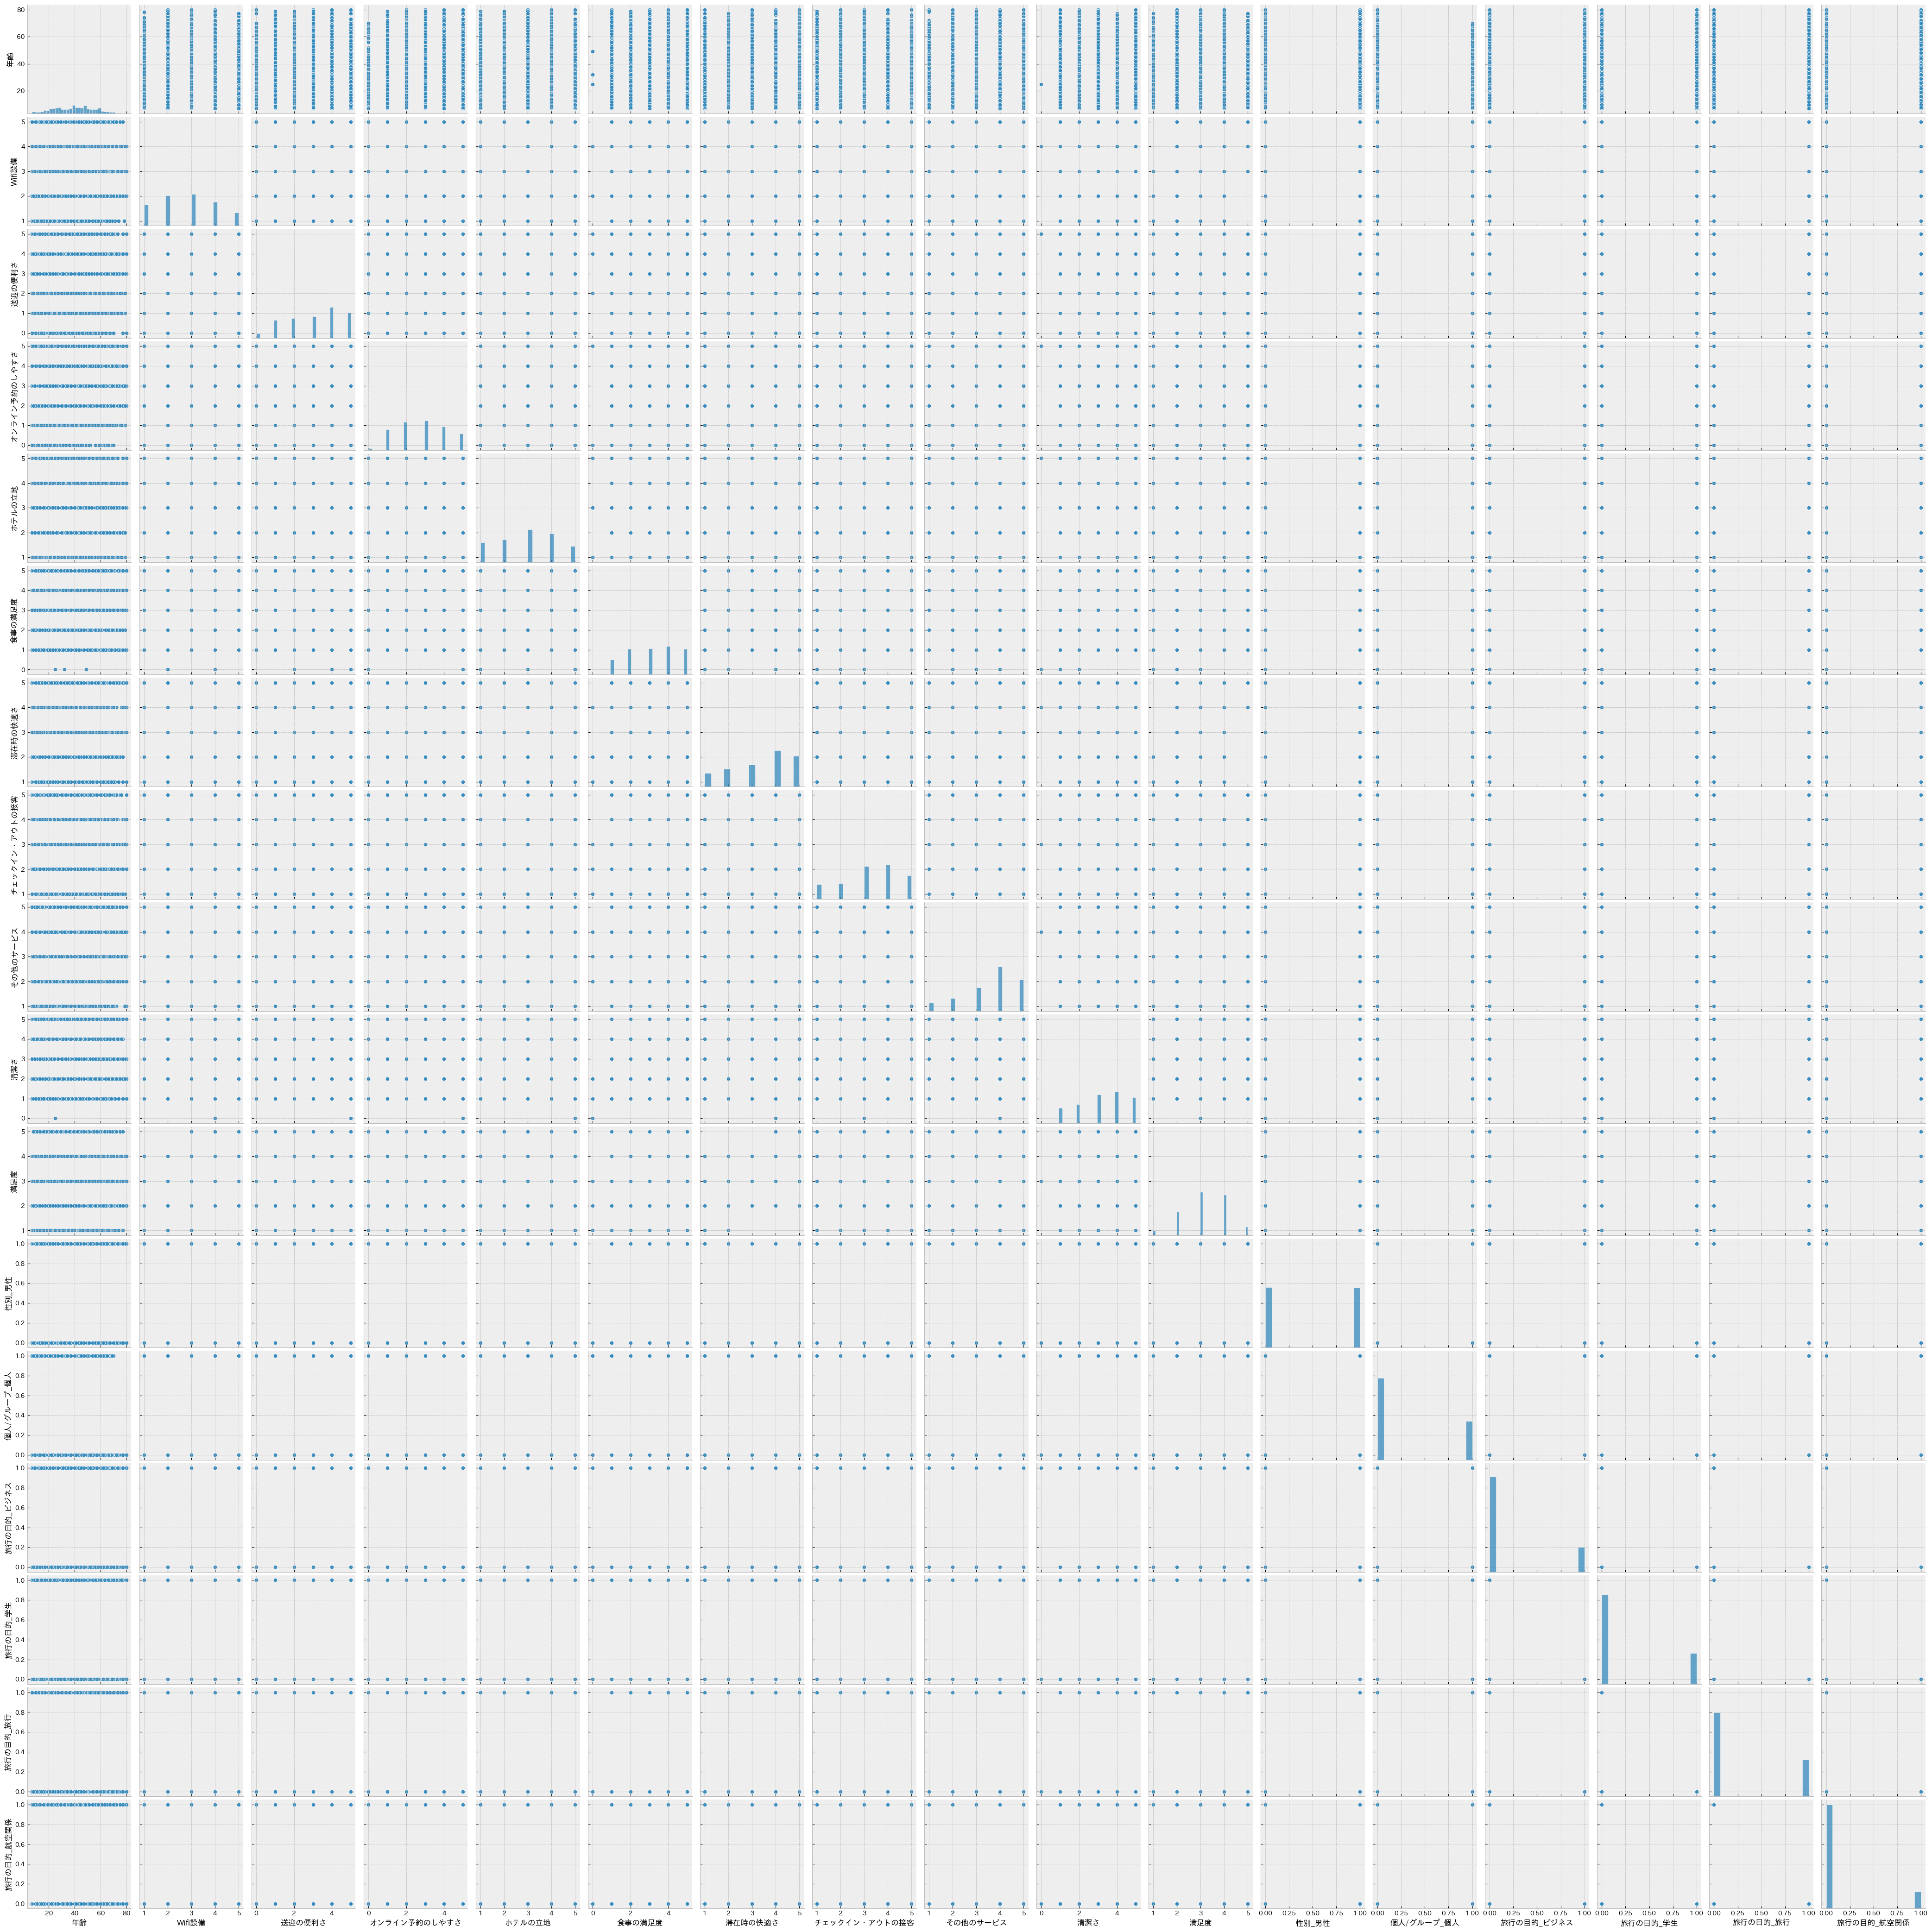

In [ ]:
# 参考
sns.pairplot(_df);

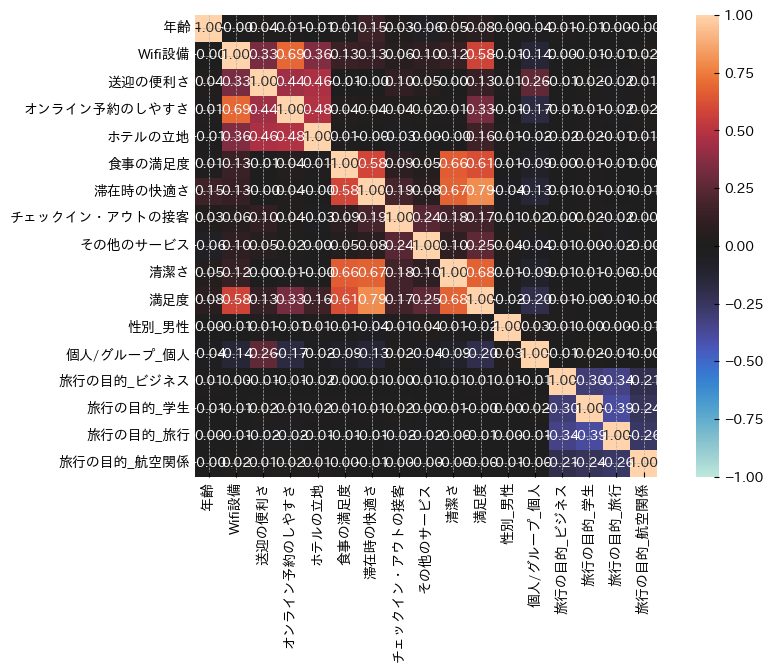

In [ ]:
# 相関分析
sns.heatmap(_df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

# 重回帰分析

In [ ]:
#標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x = _df.drop('満足度', axis=1)
y = _df['満足度']
x.head(2)

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
0,50,4,4,4,4,3,4,4,4,4,0,0,0,1,0,0
1,35,4,5,4,4,1,1,5,4,1,0,1,1,0,0,0


In [ ]:
_df.drop('満足度', axis=1).columns

Index(['年齢', 'Wifi設備', '送迎の便利さ', 'オンライン予約のしやすさ', 'ホテルの立地', '食事の満足度', '滞在時の快適さ',
       'チェックイン・アウトの接客', 'その他のサービス', '清潔さ', '性別_男性', '個人/グループ_個人', '旅行の目的_ビジネス',
       '旅行の目的_学生', '旅行の目的_旅行', '旅行の目的_航空関係'],
      dtype='object')

In [ ]:
feature = pd.DataFrame(x_scaled, columns=_df.drop('満足度', axis=1).columns)
feature.head()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
0,0.692808,0.949620,0.604184,0.870686,0.793117,-0.151073,0.426398,0.559565,0.302711,0.548147,-0.993819,-0.686310,-0.512160,1.698974,-0.661051,-0.400788
1,-0.295675,0.949620,1.278798,0.870686,0.793117,-1.658784,-1.852588,1.352038,0.302711,-1.741841,-0.993819,1.457068,1.952516,-0.588590,-0.661051,-0.400788
2,-1.152360,-1.452454,-1.419657,-1.383031,0.793117,-1.658784,1.186060,-1.817854,-0.552888,-1.741841,-0.993819,-0.686310,-0.512160,-0.588590,-0.661051,-0.400788
3,-0.625169,0.148929,0.604184,0.119447,0.793117,1.356638,-1.852588,0.559565,0.302711,1.311476,1.006219,1.457068,-0.512160,-0.588590,-0.661051,2.495082
4,1.285898,0.949620,-0.070430,0.119447,0.008552,0.602783,0.426398,-0.232908,1.158311,0.548147,1.006219,-0.686310,-0.512160,-0.588590,-0.661051,2.495082


In [ ]:
# 分析の実行
np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    満足度   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     6930.
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:53:40   Log-Likelihood:                -1386.0
No. Observations:               10000   AIC:                             2806.
Df Residuals:                    9983   BIC:                             2929.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.2019      0.003   1151.022      0.000       3.196       3.207
年齢               -0.0036      0.003     -1.271      0.204      -0.009       0.002
Wifi設備            0.4633      0.004    117.969      0.000       0.456       0.471
送迎の便利さ           -0.0154      0.004     -4.333      0.000      -0.022      -0.008
オンライン予約のしやすさ     -0.0345      0.004     -8.011      0.000      -0.043      -0.026
ホテルの立地            0.0117      0.003      3.464      0.001       0.005       0.018
食事の満足度            0.1147      0.004     29.853      0.000       0.107       0.122
滞在時の快適さ           0.5276      0.004    132.126      0.000       0.520       0.535
チェックイン・アウトの接客    -0.0299      0.003    -10.165      0.000      -0.036      -0.024
その他のサービス          0.1433      0.003     49.432      0.000       0.138       0.149
清潔さ               0.1590      0.004     37.565      0.000       0.151       0.167
性別_男性             0.0007      0.003      0.252      0.801      -0.005       0.006
個人/グループ_個人       -0.0247      0.003     -7.986      0.000      -0.031      -0.019
旅行の目的_ビジネス        0.0008      0.004      0.188      0.851      -0.008       0.010
旅行の目的_学生         -0.0039      0.005     -0.839      0.402      -0.013       0.005
旅行の目的_旅行          0.0024      0.005      0.489      0.625      -0.007       0.012
旅行の目的_航空関係       -0.0053      0.004     -1.290      0.197      -0.013       0.003
==============================================================================
Omnibus:                     3087.589   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.976
Skew:                           0.044   Prob(JB):                    6.52e-102
Kurtosis:                       1.946   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 自由度調整済み決定係数
result.rsquared_adj

np.float64(0.917274893983254)

In [ ]:
result.tvalues

,0
const,1151.021581
年齢,-1.270955
Wifi設備,117.969420
送迎の便利さ,-4.332754
オンライン予約のしやすさ,-8.011477
ホテルの立地,3.464405
食事の満足度,29.853107
滞在時の快適さ,132.125668
チェックイン・アウトの接客,-10.164707
その他のサービス,49.432387


In [ ]:
# 説明変数とt,p値, 標準偏回帰係数のデータフレームを作成
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
                          index=['t', 'p', 'coef']).T  #const排除
res_values

,t,p,coef
年齢,-1.270955,2.037742e-01,-0.003611
Wifi設備,117.969420,0.000000e+00,0.463290
送迎の便利さ,-4.332754,1.486964e-05,-0.015414
オンライン予約のしやすさ,-8.011477,1.260010e-15,-0.034454
ホテルの立地,3.464405,5.336381e-04,0.011694
食事の満足度,29.853107,1.196351e-187,0.114661
滞在時の快適さ,132.125668,0.000000e+00,0.527593
チェックイン・アウトの接客,-10.164707,3.735465e-24,-0.029936
その他のサービス,49.432387,0.000000e+00,0.143318
清潔さ,37.565036,5.530474e-289,0.159023


- t値の絶対値が2以上
- p値が5%以下

In [ ]:
# 条件抽出
# t値の絶対値が2以上かつp値が5%以下
res_values[(res_values['t'].abs()>=2.0)&(res_values['p']<0.05)].sort_values('t', ascending=False)

,t,p,coef
滞在時の快適さ,132.125668,0.000000e+00,0.527593
Wifi設備,117.969420,0.000000e+00,0.463290
その他のサービス,49.432387,0.000000e+00,0.143318
清潔さ,37.565036,5.530474e-289,0.159023
食事の満足度,29.853107,1.196351e-187,0.114661
ホテルの立地,3.464405,5.336381e-04,0.011694
送迎の便利さ,-4.332754,1.486964e-05,-0.015414
個人/グループ_個人,-7.985699,1.551319e-15,-0.024688
オンライン予約のしやすさ,-8.011477,1.260010e-15,-0.034454
チェックイン・アウトの接客,-10.164707,3.735465e-24,-0.029936


In [ ]:
df_numeric = df.select_dtypes(include=['number'])  # 数値データのみ取得
tmp = df_numeric.corr()['満足度']
tmp[tmp.abs() > 0.5].sort_values(ascending=False)


,満足度
満足度,1.000000
滞在時の快適さ,0.793672
清潔さ,0.678053
食事の満足度,0.612857
Wifi設備,0.575273


- 滞在時の快適さ
- Wifi設備
- 清潔さ
- 食事の満足度